In [184]:
import numpy as np

class ObstacleAvoidance:
    def __init__(self, n, a, b, k, lambda_):
        if n == 0 or a == 0 or b == 0 or k == 0:
            raise ValueError("The obstacle detection constants must be declared")
        self.n = n
        self.a = a
        self.b = b
        self.k = k
        self.lambda_ = lambda_
        self.gamma = 1.0
        self.a_aux = None
        self.J = np.zeros((2, 1))
        self.V = 0

    def calculate_V(self, x_diff, y_diff):
        return np.exp(-(np.power(x_diff, self.n)) / (self.a*self.gamma)) * np.exp(-np.power(y_diff, self.n) / self.b)

    def Calculate_J(self, v, x_diff, y_diff):
        result = np.zeros(2)
        result[0] = -v * self.n * np.power(x_diff, self.n - 1) / (self.a * self.gamma)
        result[1] = -v * self.n * np.power(y_diff, self.n - 1) / self.b
        return result

    def obstacle_avoidance(self, robot_point, obstacle_point, gamma=1.0):
        x_diff = robot_point[0] - obstacle_point[0]
        y_diff = robot_point[1] - obstacle_point[1]
        
        if gamma == 0:
            gamma = 0.001
        
        self.gamma = gamma

        v = self.calculate_V(x_diff, y_diff)
        self.V = v

        J_ob = self.Calculate_J(v, x_diff, y_diff)

        J = np.array([[J_ob[0], J_ob[1]]])

        self.J = J

        Pseudo_inv_J = J.T @ np.linalg.inv(J @ J.T + self.lambda_)

        X_dot_obs = -Pseudo_inv_J * self.k * v

        x_dot_obs = X_dot_obs[0]
        y_dot_obs = X_dot_obs[1]

        return x_dot_obs, y_dot_obs

    def get_J(self):
        return self.J

    def get_v(self):
        return self.V

    
robot_point = np.array([0, 0])
obstacle_point = np.array([0.5, 0.7])


obs_avoidance = ObstacleAvoidance(2, 0.3, 0.3, 0.15, 0.01)


# x_obs = obs_avoidance.obstacle_avoidance(robot_point, obstacle_point, 1.0)
# print(x_obs)

In [185]:
robot_point = np.array([0, 0])
obstacle_point = np.array([0.5, 0.0])

width = 0.1

margin = 0.3

if np.abs(robot_point[1] - obstacle_point[1]) < width / 2:
    gamma = 1.0
elif np.abs(robot_point[1] - obstacle_point[1]) < width / 2 + margin:
    gamma = 1.0 - (np.abs(robot_point[1] - obstacle_point[1]) - width / 2) / margin
else:
    gamma = 0.0

print(f"Gamma = {gamma}\n")
obs_avoidance = ObstacleAvoidance(2, 0.3, 0.3, 0.15, 0.05)

x_obs = obs_avoidance.obstacle_avoidance(robot_point, obstacle_point, 0.1)
print(f"X_obs = {x_obs}\n")

V = obs_avoidance.get_v()
print(f"V = {V}\n")

J = obs_avoidance.get_J()
print(f"J = {J}\n")

Gamma = 1.0

X_obs = (array([-5.77033973e-06]), array([-0.]))

V = 0.00024036947641951407

J = [[ 0.00801232 -0.        ]]



In [186]:
robot_point = np.array([0, 0])
obstacle_point = np.array([0.5, 0.0])

obs_avoidance = ObstacleAvoidance(2, 0.3, 0.3, 0.15, 0.05)

x_obs = obs_avoidance.obstacle_avoidance(robot_point, obstacle_point, 1.0)
print(f"X_obs = {x_obs}\n")

V = obs_avoidance.get_v()
print(f"V = {V}\n")

J = obs_avoidance.get_J()
print(f"J = {J}\n")

X_obs = (array([-0.04395282]), array([-0.]))

V = 0.4345982085070782

J = [[ 1.4486607 -0.       ]]



(-0.0745, 1.5645, -0.06831377461818827, 0.003253036886580394)

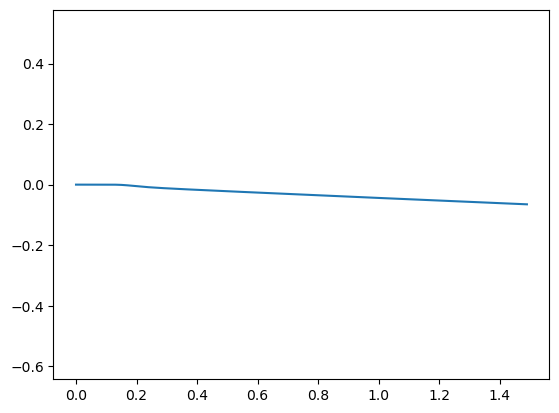

In [187]:
import matplotlib.pyplot as plt

robot_point = np.array([0, 0])
obstacle_point = np.array([0.5, 0.0])

x_obs_list = []

resolution = 0.01
for gamma in np.arange(0, 1.5, resolution):
    x_obs = obs_avoidance.obstacle_avoidance(robot_point, obstacle_point, gamma)
    x_obs_list.append(x_obs)

x_obs_list = np.array(x_obs_list)
x_obs_list.shape

x = [x[0, 0] for x in x_obs_list]

plt.plot(np.arange(0, 1.5, resolution), x)
plt.axis("equal")

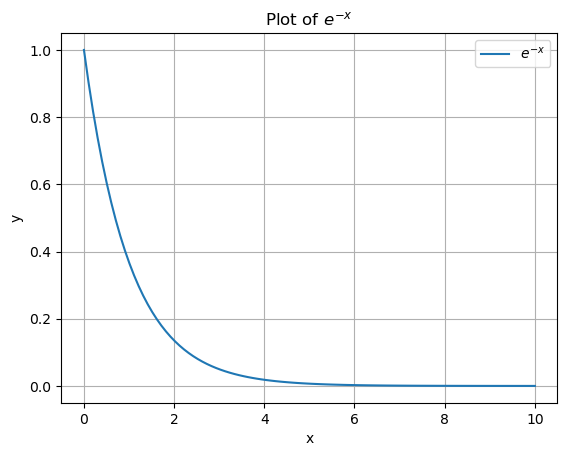

In [124]:
import numpy as np
import matplotlib.pyplot as plt

# Define the x values
x = np.linspace(0, 10, 100)

# Define the function y = exp(-x)
y = np.exp(-x)

# Create the plot
plt.plot(x, y, label=r'$e^{-x}$')

# Add title and labels
plt.title('Plot of $e^{-x}$')
plt.xlabel('x')
plt.ylabel('y')

# Add a grid
plt.grid(True)

# Add a legend
plt.legend()

# Show the plot
plt.show()